In [2]:
#!/usr/bin/env python
# coding: utf-8

#Import all the dependencies
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join
import pandas as pd

import nltk
nltk.download('stopwords')

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leslie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("all_reviewer_reviews.csv")
docLabels = data['name']

tokenizer = RegexpTokenizer(r'\w+')
stopword_set = set(stopwords.words('english'))
#This function does all cleaning of data using two objects above

def nlp_clean(data):
    new_data = []
    for d in data:
        new_str = d.lower()
        dlist = tokenizer.tokenize(new_str)
        dlist = list(set(dlist).difference(stopword_set))
        new_data.append(dlist)
    return new_data

class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.TaggedDocument(doc, [self.labels_list[idx]])




In [4]:
data = nlp_clean(data['review'])

data


[['redang',
  'toast',
  'address',
  '2',
  'selected',
  'central',
  '30am',
  'interestingly',
  'b1',
  'set',
  'toastwich',
  '9pm',
  'kaya',
  'drink',
  'singapore',
  'soft',
  'yuan',
  'eggs',
  '7',
  'boiled',
  '509',
  'breakfast',
  'round',
  'choice',
  'iced',
  'yang',
  'large',
  'teh',
  'top',
  '529',
  'open',
  'ya',
  'butter',
  'century',
  'square',
  '20',
  'beverage',
  '5',
  'kun',
  '22',
  'chicken',
  'tampines',
  '4',
  'frothy',
  'blender',
  '60'],
 ['prawn',
  'mee',
  'close',
  'topped',
  'lor',
  '50',
  'fish',
  'address',
  '460',
  'note',
  '1',
  '77',
  'friday',
  'half',
  'singapore',
  'lunch',
  'fritter',
  '509',
  'today',
  'long',
  'blk',
  'braised',
  'kueh',
  'sadly',
  'belly',
  '511',
  'tiao',
  'bedok',
  'queue',
  'roll',
  '01',
  'meatballs',
  'five',
  'north',
  'pork',
  'spice',
  '卤面',
  'egg',
  '4',
  '3',
  'street'],
 ['address',
  'sundae',
  'meal',
  'selected',
  'came',
  '769',
  'small',


In [5]:
it = LabeledLineSentence(data, docLabels)

it.doc_list[0] # the first documents

['redang',
 'toast',
 'address',
 '2',
 'selected',
 'central',
 '30am',
 'interestingly',
 'b1',
 'set',
 'toastwich',
 '9pm',
 'kaya',
 'drink',
 'singapore',
 'soft',
 'yuan',
 'eggs',
 '7',
 'boiled',
 '509',
 'breakfast',
 'round',
 'choice',
 'iced',
 'yang',
 'large',
 'teh',
 'top',
 '529',
 'open',
 'ya',
 'butter',
 'century',
 'square',
 '20',
 'beverage',
 '5',
 'kun',
 '22',
 'chicken',
 'tampines',
 '4',
 'frothy',
 'blender',
 '60']

In [6]:
it.labels_list[0]

'Ya Kun Kaya Toast'

In [7]:
model = gensim.models.Doc2Vec(vector_size=1000, min_count=5, alpha=0.025, min_alpha=0.025)

model.build_vocab(it)

model.train(it, total_examples= model.corpus_count, epochs = 10, start_alpha=0.002, end_alpha=-0.016)

model.corpus_count ## check the corpus

17773

In [12]:
len(model.dv)

5426

In [8]:
# model.save('output.csv')
vocab, vectors = model.wv.key_to_index, model.wv.vectors

# get node name and embedding vector index.
name_index = np.array([(v[0], v[1]) for v in vocab.items()])

# init dataframe using embedding vectors and set index as node name
df =  pd.DataFrame(vectors[name_index[:,1].astype(int)])
df.index = name_index[:, 0]
df.to_csv("reviewer_word2vec_embedding.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
singapore,2.289094,0.065499,1.137067,1.815232,-0.371031,-0.720849,0.504346,-0.113895,0.162184,-0.597726,...,1.342013,-0.251802,2.043363,0.617967,0.537062,-0.751618,-0.556865,-1.638718,-0.002297,-0.619347
good,2.337764,0.066511,1.161283,1.849897,-0.378243,-0.735578,0.513182,-0.116868,0.165668,-0.610136,...,1.370245,-0.258046,2.084474,0.630414,0.545824,-0.767030,-0.568588,-1.672261,-0.003326,-0.631618
sauce,2.022661,0.058405,1.003954,1.603297,-0.324343,-0.634276,0.444342,-0.102856,0.144956,-0.526971,...,1.185661,-0.222155,1.805974,0.544455,0.472909,-0.662119,-0.490905,-1.449074,-0.004139,-0.547176
rice,1.874125,0.053591,0.930394,1.485821,-0.303260,-0.589466,0.412900,-0.094202,0.133869,-0.488300,...,1.099646,-0.207320,1.673023,0.505094,0.438876,-0.614436,-0.455983,-1.342305,-0.003132,-0.507913
available,2.379059,0.068275,1.181451,1.884270,-0.382673,-0.748491,0.522399,-0.121430,0.170309,-0.620576,...,1.396381,-0.262945,2.122713,0.639239,0.556820,-0.779393,-0.578005,-1.703882,-0.005149,-0.644535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k4,0.063637,0.002331,0.031117,0.050073,-0.011165,-0.018892,0.014183,-0.003210,0.004693,-0.017108,...,0.036270,-0.007528,0.055681,0.016950,0.015357,-0.021032,-0.014471,-0.045751,-0.000935,-0.017670
woodssquaresg,0.050268,0.001590,0.026002,0.041052,-0.008493,-0.015701,0.010507,-0.003362,0.003947,-0.013537,...,0.029740,-0.005604,0.045188,0.014459,0.012689,-0.017598,-0.012240,-0.036348,0.000713,-0.014015
recreate,0.018784,0.000568,0.009440,0.014738,-0.002631,-0.006836,0.004847,-0.001913,0.001461,-0.004850,...,0.011610,-0.001761,0.016487,0.004772,0.005059,-0.005956,-0.004423,-0.014554,0.000283,-0.004826
touched,0.055622,0.002560,0.027190,0.043539,-0.008559,-0.017969,0.012763,-0.003357,0.004462,-0.014638,...,0.033653,-0.006236,0.049503,0.014137,0.012355,-0.018304,-0.014360,-0.039151,0.000480,-0.015306


In [52]:
# model.save('output.csv')
vocab, vectors = model.dv.key_to_index, model.dv.vectors

# get node name and embedding vector index.
name_index = np.array([(v[0], v[1]) for v in vocab.items()])

# init dataframe using embedding vectors and set index as node name
result =  pd.DataFrame(vectors[name_index[:,1].astype(int)])
result.index = name_index[:, 0]
result.to_csv("reviewer_doc2vec_embedding.csv")
result

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Ya Kun Kaya Toast,0.067479,-0.015262,0.031481,0.012758,-0.013636,-0.026314,0.017043,-0.001414,0.007609,-0.029237,...,0.030689,-0.011826,0.081560,0.016560,0.020398,-0.003195,-0.020281,-0.046672,0.012740,-0.028682
511 Lor Mee,0.052415,-0.012169,0.025895,0.008703,-0.011544,-0.019700,0.014791,-0.000708,0.007404,-0.022549,...,0.022999,-0.009437,0.062308,0.012626,0.014971,-0.003251,-0.014961,-0.036968,0.009907,-0.022334
McDonald's,0.073633,-0.016048,0.034180,0.011720,-0.014445,-0.027671,0.019323,-0.001385,0.009918,-0.032095,...,0.031814,-0.011578,0.086562,0.017073,0.020503,-0.002735,-0.019974,-0.050600,0.014232,-0.030088
Tian Yu Tian Fish Head Steamboat,0.003900,-0.000644,0.002345,0.001683,-0.001465,-0.000774,0.002095,0.000722,0.001247,-0.001772,...,0.002668,-0.001169,0.004494,0.000442,0.001690,0.000689,-0.001116,-0.003537,0.000662,-0.001997
Kiroi Freshly Baked Cheese Cake,0.004485,-0.002038,0.002077,0.001646,-0.000463,-0.002203,0.002104,-0.000720,0.000980,-0.002203,...,0.001891,-0.000473,0.006506,0.001140,0.001302,-0.000872,-0.001489,-0.003136,0.000244,-0.001600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FATCAT Ice Cream Bar (Bedok),0.109580,-0.024108,0.052540,0.019092,-0.021957,-0.042979,0.029978,-0.000619,0.013350,-0.048218,...,0.048495,-0.019367,0.129693,0.024698,0.031017,-0.004609,-0.030229,-0.076074,0.021923,-0.045851
Spicy Thai - Thai Cafe,0.123586,-0.026610,0.058788,0.022225,-0.025580,-0.048148,0.033034,-0.001202,0.016024,-0.052832,...,0.054378,-0.020048,0.146183,0.028209,0.035974,-0.005994,-0.034745,-0.084516,0.025341,-0.051934
Earth Jar Treasure,0.062672,-0.013902,0.029137,0.010195,-0.013783,-0.024065,0.015981,-0.001809,0.007968,-0.027894,...,0.028590,-0.011385,0.075370,0.013528,0.018676,-0.002701,-0.018689,-0.043928,0.012785,-0.026301
Hup Seng Duck Rice,0.197898,-0.042591,0.095775,0.034153,-0.041712,-0.076587,0.053472,-0.002361,0.024256,-0.085846,...,0.087901,-0.033749,0.234726,0.046294,0.057247,-0.009408,-0.056032,-0.136266,0.040670,-0.082861


In [53]:
similar_doc = model.docvecs.most_similar(0) #### similarity with the first document
print(similar_doc)

two_doc = model.docvecs.similarity(it.labels_list[0], it.labels_list[1]) ## similarity between the two documents.
print(two_doc)


[(nan, 0.999822199344635), ('              Firangi Superstar            ', 0.9998220801353455), ('              Miznon            ', 0.9998219609260559), ('              Odette (National Gallery Singapore)            ', 0.9998219013214111), ("              L'éclair Pâtisserie (Dhoby Ghaut)            ", 0.9998218417167664), ('              Naked Finn            ', 0.9998217821121216), ('              Clos Pasoh            ', 0.9998217225074768), ('              CUT by Wolfgang Puck            ', 0.999821662902832), ('              Xiao Yao Ge            ', 0.9998215436935425), ('              Braci            ', 0.9998215436935425)]
0.99954414


<ipython-input-53-83aecec188a2>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = model.docvecs.most_similar(0) #### similarity with the first document
<ipython-input-53-83aecec188a2>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  two_doc = model.docvecs.similarity(it.labels_list[0], it.labels_list[1]) ## similarity between the two documents.


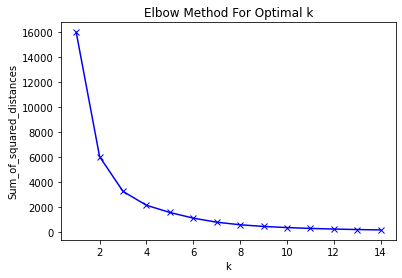

In [54]:
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    #X = kmeans.fit(model.docvecs.doctag_syn0) ###using documnet vecter numbers. doctag_syn0 calls doc2vec that is trained earlier.
    X = kmeans.fit(model.dv.vectors)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100) ### elbow result shows 3 is the best results
#X = kmeans.fit(model.docvecs.doctag_syn0)
X = kmeans.fit(model.dv.vectors)
labels = kmeans.labels_.tolist()

kmeansdata = pd.read_csv("reviewer_doc2vec_embedding.csv")
kmeansdata.rename(columns={'Unnamed: 0':'documents'}, inplace=True)
kmeansdata

,documents,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,Ya Kun Kaya Toast,0.067479,-0.015262,0.031481,0.012758,-0.013636,-0.026314,0.017043,-0.001414,0.007609,...,0.030689,-0.011826,0.081560,0.016560,0.020398,-0.003195,-0.020281,-0.046672,0.012740,-0.028682
1,511 Lor Mee,0.052415,-0.012169,0.025895,0.008703,-0.011544,-0.019700,0.014791,-0.000708,0.007404,...,0.022999,-0.009437,0.062308,0.012626,0.014971,-0.003251,-0.014961,-0.036968,0.009907,-0.022334
2,McDonald's,0.073633,-0.016048,0.034180,0.011720,-0.014445,-0.027671,0.019323,-0.001385,0.009918,...,0.031814,-0.011578,0.086562,0.017073,0.020503,-0.002735,-0.019974,-0.050600,0.014232,-0.030088
3,Tian Yu Tian Fish Head Steamboat,0.003900,-0.000644,0.002345,0.001683,-0.001465,-0.000774,0.002095,0.000722,0.001247,...,0.002668,-0.001169,0.004494,0.000442,0.001690,0.000689,-0.001116,-0.003537,0.000662,-0.001997
4,Kiroi Freshly Baked Cheese Cake,0.004485,-0.002038,0.002077,0.001646,-0.000463,-0.002203,0.002104,-0.000720,0.000980,...,0.001891,-0.000473,0.006506,0.001140,0.001302,-0.000872,-0.001489,-0.003136,0.000244,-0.001600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,FATCAT Ice Cream Bar (Bedok) ...,0.109580,-0.024108,0.052540,0.019092,-0.021957,-0.042979,0.029978,-0.000619,0.013350,...,0.048495,-0.019367,0.129693,0.024698,0.031017,-0.004609,-0.030229,-0.076074,0.021923,-0.045851
5422,Spicy Thai - Thai Cafe,0.123586,-0.026610,0.058788,0.022225,-0.025580,-0.048148,0.033034,-0.001202,0.016024,...,0.054378,-0.020048,0.146183,0.028209,0.035974,-0.005994,-0.034745,-0.084516,0.025341,-0.051934
5423,Earth Jar Treasure,0.062672,-0.013902,0.029137,0.010195,-0.013783,-0.024065,0.015981,-0.001809,0.007968,...,0.028590,-0.011385,0.075370,0.013528,0.018676,-0.002701,-0.018689,-0.043928,0.012785,-0.026301
5424,Hup Seng Duck Rice,0.197898,-0.042591,0.095775,0.034153,-0.041712,-0.076587,0.053472,-0.002361,0.024256,...,0.087901,-0.033749,0.234726,0.046294,0.057247,-0.009408,-0.056032,-0.136266,0.040670,-0.082861


In [71]:

kmeansdata['kmeanscluster'] = labels

kmeansdata.head()

,documents,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,kmeanscluster
0,Ya Kun Kaya Toast,0.067479,-0.015262,0.031481,0.012758,-0.013636,-0.026314,0.017043,-0.001414,0.007609,...,-0.011826,0.081560,0.016560,0.020398,-0.003195,-0.020281,-0.046672,0.012740,-0.028682,1
1,511 Lor Mee,0.052415,-0.012169,0.025895,0.008703,-0.011544,-0.019700,0.014791,-0.000708,0.007404,...,-0.009437,0.062308,0.012626,0.014971,-0.003251,-0.014961,-0.036968,0.009907,-0.022334,1
2,McDonald's,0.073633,-0.016048,0.034180,0.011720,-0.014445,-0.027671,0.019323,-0.001385,0.009918,...,-0.011578,0.086562,0.017073,0.020503,-0.002735,-0.019974,-0.050600,0.014232,-0.030088,1
3,Tian Yu Tian Fish Head Steamboat,0.003900,-0.000644,0.002345,0.001683,-0.001465,-0.000774,0.002095,0.000722,0.001247,...,-0.001169,0.004494,0.000442,0.001690,0.000689,-0.001116,-0.003537,0.000662,-0.001997,1
4,Kiroi Freshly Baked Cheese Cake,0.004485,-0.002038,0.002077,0.001646,-0.000463,-0.002203,0.002104,-0.000720,0.000980,...,-0.000473,0.006506,0.001140,0.001302,-0.000872,-0.001489,-0.003136,0.000244,-0.001600,1


In [72]:
kmeansdata['kmeanscluster'].value_counts()



1    3660
0    1429
2     337
Name: kmeanscluster, dtype: int64

In [73]:
df1 = kmeansdata[kmeansdata['kmeanscluster'] == 0]

df1.head()

,documents,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,kmeanscluster
6,BBQ Tori Shokudo,0.122239,-0.026131,0.057379,0.020662,-0.025017,-0.046200,0.031833,-0.002122,0.015851,...,-0.020306,0.143623,0.027224,0.034596,-0.005467,-0.035065,-0.083208,0.024174,-0.051106,0
12,Kazoku Japanese Cuisine,0.190699,-0.040362,0.091410,0.034224,-0.039156,-0.073981,0.049700,-0.001898,0.024686,...,-0.032011,0.225693,0.043145,0.055493,-0.008902,-0.053977,-0.131019,0.038293,-0.080134,0
13,Xing Ji Rou Cuo Mian (85 Fengsha...,0.255928,-0.054879,0.123271,0.045133,-0.053071,-0.099440,0.067409,-0.003772,0.033360,...,-0.044142,0.304879,0.059977,0.074426,-0.011168,-0.073158,-0.176083,0.052026,-0.107260,0
14,Heng Hua Restaurant (Yishun) ...,0.138473,-0.029051,0.066977,0.025212,-0.028274,-0.052969,0.037399,-0.002455,0.018382,...,-0.022899,0.164779,0.031553,0.040549,-0.005815,-0.039448,-0.095785,0.027208,-0.058271,0
20,Haidilao Hot Pot (Sun Plaza) ...,0.247265,-0.053130,0.117490,0.042528,-0.050395,-0.094811,0.066107,-0.003596,0.031668,...,-0.041527,0.292480,0.056484,0.071189,-0.011091,-0.071080,-0.169332,0.049003,-0.102470,0


In [74]:
df1documents = df1['documents']

df1documents.head()

6                                      BBQ Tori Shokudo
12                  Kazoku Japanese Cuisine            
13                  Xing Ji Rou Cuo Mian (85 Fengsha...
14                  Heng Hua Restaurant (Yishun)    ...
20                  Haidilao Hot Pot (Sun Plaza)    ...
Name: documents, dtype: object

In [83]:
import nltk
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    # stop_free = " ".join([i for i in doc.split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in df1documents]

[nltk_data] Downloading package wordnet to /Users/leslie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]  ##Bag of words Document_term_matrix create.

Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)


print(ldamodel.print_topics(num_topics=100, num_words=10))

[(0, '0.020*"centre" + 0.019*"food" + 0.015*"city" + 0.014*"market" + 0.012*"restaurant" + 0.010*"road" + 0.009*"northpoint" + 0.008*"mall" + 0.006*"tampines" + 0.006*"kee"'), (1, '0.013*"plaza" + 0.012*"singapore" + 0.010*"bar" + 0.010*"orchard" + 0.008*"cafe" + 0.008*"restaurant" + 0.007*"kitchen" + 0.007*"jurong" + 0.006*"changi" + 0.006*"house"')]


In [103]:
output1 = []
for index, topic in ldamodel.show_topics(num_topics=100,formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    output1.append(w[0] for w in topic)
output1_df = pd.DataFrame(output1)
output1_df.to_csv('reviewer_ldamodel1.csv')

Topic: 0 
Words: ['centre', 'food', 'city', 'market', 'restaurant', 'road', 'northpoint', 'mall', 'tampines', 'kee']
Topic: 1 
Words: ['plaza', 'singapore', 'bar', 'orchard', 'cafe', 'restaurant', 'kitchen', 'jurong', 'changi', 'house']


In [77]:
df2 = kmeansdata[kmeansdata.kmeanscluster == 1]


df2documents = df2['documents']

doc_clean = [clean(doc).split() for doc in df2documents]

Lda2 = gensim.models.ldamodel.LdaModel

ldamodel2 = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)

print(ldamodel2.print_topics(num_topics=100, num_words=10))

[(0, '0.016*"singapore" + 0.012*"restaurant" + 0.011*"bar" + 0.010*"orchard" + 0.010*"plaza" + 0.009*"mall" + 0.008*"cafe" + 0.008*"kitchen" + 0.008*"hotel" + 0.006*"square"'), (1, '0.022*"food" + 0.019*"centre" + 0.014*"city" + 0.013*"market" + 0.009*"northpoint" + 0.008*"road" + 0.008*"restaurant" + 0.007*"house" + 0.006*"jurong" + 0.006*"seafood"')]


In [104]:
output2 = []
for index, topic in ldamodel2.show_topics(num_topics=100,formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    output2.append(w[0] for w in topic)
output2_df = pd.DataFrame(output2)
output2_df.to_csv('reviewer_ldamodel2.csv')

Topic: 0 
Words: ['singapore', 'restaurant', 'bar', 'orchard', 'plaza', 'mall', 'cafe', 'kitchen', 'hotel', 'square']
Topic: 1 
Words: ['food', 'centre', 'city', 'market', 'northpoint', 'road', 'restaurant', 'house', 'jurong', 'seafood']


In [92]:
df3 = kmeansdata[kmeansdata.kmeanscluster == 2]
df3['documents'] = df3['documents'].values.astype(str)

df3documents = df3['documents']

doc_clean = [clean(doc).split() for doc in df3documents]

Lda3 = gensim.models.ldamodel.LdaModel

ldamodel3 = Lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)

print(ldamodel3.print_topics(num_topics=100, num_words=10))

<ipython-input-92-4fe7db4112ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['documents'] = df3['documents'].values.astype(str)


[(0, '0.022*"food" + 0.018*"centre" + 0.013*"restaurant" + 0.013*"city" + 0.011*"market" + 0.010*"road" + 0.010*"northpoint" + 0.009*"bar" + 0.009*"coffee" + 0.008*"plaza"'), (1, '0.015*"singapore" + 0.009*"square" + 0.009*"mall" + 0.008*"kitchen" + 0.008*"house" + 0.007*"hotel" + 0.007*"restaurant" + 0.006*"rice" + 0.006*"east" + 0.006*"thai"')]


In [105]:
output3 = []
for index, topic in ldamodel3.show_topics(num_topics=100,formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    output3.append(w[0] for w in topic)
output3_df = pd.DataFrame(output3)
output3_df.to_csv('reviewer_ldamodel3.csv')

Topic: 0 
Words: ['food', 'centre', 'restaurant', 'city', 'market', 'road', 'northpoint', 'bar', 'coffee', 'plaza']
Topic: 1 
Words: ['singapore', 'square', 'mall', 'kitchen', 'house', 'hotel', 'restaurant', 'rice', 'east', 'thai']
